In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [33]:
data = pd.read_csv("advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
data.shape

(200, 4)

In [8]:
data.size

800

In [9]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
x = data.drop(['Sales'], axis = 1)
y = data['Sales']

In [11]:
print(x)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


In [12]:
print(y)

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [15]:
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y)

LinearRegression()

In [29]:
x_poly_test = poly_reg.transform(x_test)
y_pred = lin_reg_2.predict(x_poly_test)
np.set_printoptions(precision=2)
print(y_test)
print()
print(y_pred)

18     11.3
170     8.4
107    12.0
98     25.4
177    16.7
182     8.7
5       7.2
146    18.2
12      9.2
152    16.6
61     24.2
125    10.6
180    15.5
154    20.6
80     11.8
7      13.2
33     17.4
130     1.6
37     14.7
74     17.0
183    26.2
145    10.3
45     16.1
159    12.9
60      8.1
123    15.2
179    17.6
185    22.6
122    16.6
44      8.5
16     12.5
55     23.7
150    16.1
111    21.8
22      5.6
189     6.7
129     9.7
4      17.9
83     13.6
106     7.2
Name: Sales, dtype: float64

[11.22  9.24 10.16 24.78 15.33  9.12  8.19 18.99  9.33 17.68 24.54 11.29
 13.89 17.1  12.18 13.82 19.79  3.33 14.31 18.55 25.97 12.96 16.28 13.75
  8.81 15.71 15.4  21.8  17.02  7.82 12.36 23.09 19.41 21.67  6.    5.99
  9.79 16.96 13.69  6.7 ]


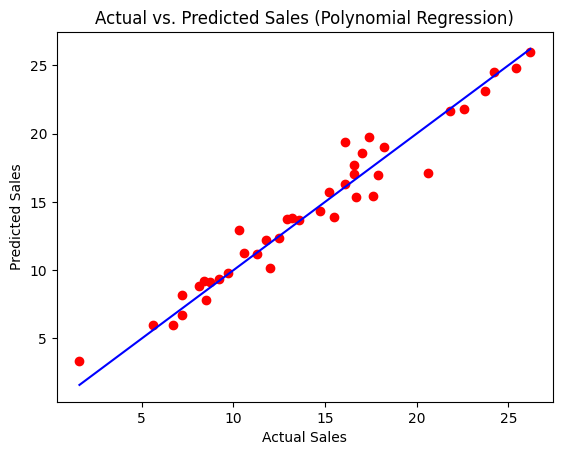

In [30]:
plt.scatter(y_test, y_pred, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales (Polynomial Regression)')
plt.show()

In [32]:
y_pred = lin_reg_2.predict(x_poly_test)
accurancy = r2_score(y_test, y_pred)
print("Accurancy:", accurancy)
percantage = accurancy*100
print("Percantage of Accurancy:", percantage)

Accurancy: 0.9516906798195807
Percantage of Accurancy: 95.16906798195807
